## Importing The Necessary Libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Data Analysis Projects\EVs Market Analysis\EVs_Market.csv')

df = df_original.copy()

df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


## Data Cleaning:

##### - Handling missing values

In [3]:
# check if there are missing values in the dataset
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [4]:
# dropping missing values from the dataset
df = df.dropna()

## Exploratory Data Analysis (EDA):
- #### **Points To Explore:**

     - **5 -** EV Range:
        - How has the distribution of electric vehicle ranges changed over time?
        - What are the key differences in range between different models by manufacturers?
     

-  **Note:** 
   -  *In 2024, 7072 EVs ara registered which suggests that the dataset for 2024 is incomplete.* 

In [5]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

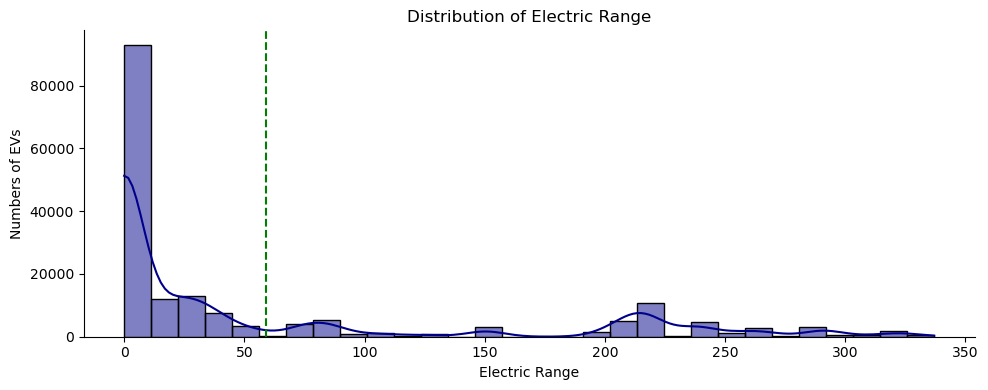

In [80]:
plt.figure(figsize=(10, 4))

# Plottin The Distribution of Electric Range
sns.histplot(df['Electric Range'], bins=30, kde=True, color='darkblue')

plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Numbers of EVs')

plt.axvline(df['Electric Range'].mean(), color='green', linestyle='--', label='Mean')

sns.despine()
plt.tight_layout()
plt.show()


- **Key Insights:**
    -   Concentration Around Lower Ranges:

        -   The majority of EVs have an electric range between 0 to 50 miles.

        -   Within this range, there's a particularly high concentration around 0 to 25 miles, indicating that many EVs are designed for shorter distances.

    -   Significant Drop Beyond 50 Miles:

        -   There is a noticeable decline in the number of EVs as the range exceeds 50 miles. This could suggest fewer options or higher costs for longer-range EVs.

    -   Threshold at 50 Miles:

        -   The green dashed vertical line at around 50 miles may denote a significant threshold, possibly related to regulatory standards, market preferences, or technological limitations.

    -   Smaller Peaks at Higher Ranges:

        -   There are minor peaks at roughly 100, 150, 200, and 250 miles, indicating that some EVs are capable of these ranges but are much less common compared to the 0-50 mile range.

____

-  Now let's analyze the progression of electric vehicle (EV) ranges over the years from 1997 to 2024:

In [7]:
top_5_make = df['Make'].value_counts().head(5).index

In [8]:
df_top5_makes = df[df['Make'].isin(top_5_make)]

#df_top5_makes

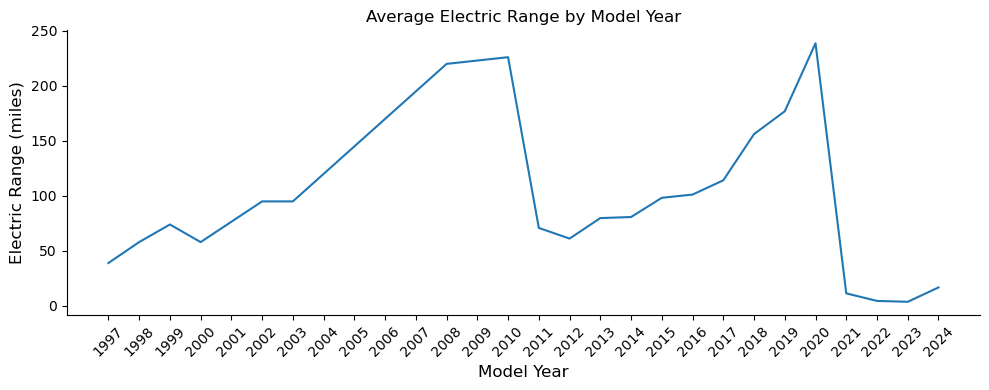

In [29]:
# Group data by Model Year and calculate the average Electric Range
range_by_year = df.groupby('Model Year', as_index=False)['Electric Range'].mean()

plt.figure(figsize=(10, 4))
# Plot using the averafe range by model year
sns.lineplot(data=range_by_year, x='Model Year', y='Electric Range', marker='')


plt.title('Average Electric Range by Model Year', fontsize=12)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Electric Range (miles)', fontsize=12)

plt.xticks(range(range_by_year['Model Year'].min(), range_by_year['Model Year'].max()+1), rotation=45)

sns.despine()
plt.tight_layout()
plt.show()


-   **Key Insights:**

    -   Initial Gradual Increase (1997-2009):

        -   The average electric range steadily increases from around 1997 to 2009, peaking at approximately 200 miles. This trend likely reflects advancements in battery technology and increasing investment in electric vehicles.

    -   Significant Drop Around 2010:

        -   There is a noticeable sharp decline in the average electric range around 2010. This could be due to various factors, such as economic conditions, shifts in manufacturing focus, or changes in regulatory environments.

    -   Steady Increase (2011-2020):

        -   Post-2010, the average electric range begins to rise again, reaching a peak of about 250 miles in 2020. This period likely saw renewed efforts in technological innovation and consumer demand for longer-range EVs.

    -   Recent Decline (2021-2024):

        -   From 2021 onwards, there's a sharp decline in the average electric range, with a slight uptick in 2024. This fluctuation may indicate market adjustments, supply chain disruptions, or shifts in industry focus.

___

- Now let's see The Average Electric Range by the EVs Type 

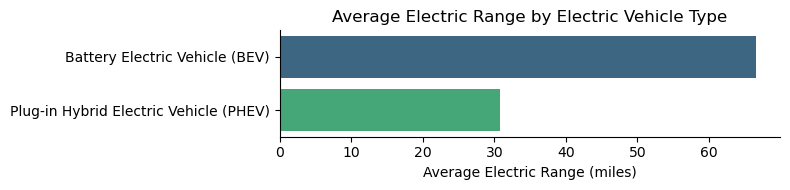

In [48]:


# Calculate the average Electric Range by Electric Vehicle Type
range_by_ev_type = df.groupby('Electric Vehicle Type', as_index=False)['Electric Range'].mean()

# Plot the comparison using Seaborn
plt.figure(figsize=(8, 2))
sns.barplot(data=range_by_ev_type, y='Electric Vehicle Type', x='Electric Range', palette='viridis')


plt.title('Average Electric Range by Electric Vehicle Type', fontsize=12)
plt.ylabel('')
plt.xlabel('Average Electric Range (miles)')
plt.xticks(rotation=0)

sns.despine()
plt.tight_layout()
plt.show()

-   **Key Insights:**

    -   BEVs have a significantly higher average electric range, approximately 65 miles, compared to PHEVs, which have an average range of around 30 miles. This highlights the difference in design and purpose between the two types of vehicles.

    -   BEVs are designed for longer trips solely on electric power, which is reflected in their higher average range. PHEVs, on the other hand, combine electric power with a conventional internal combustion engine, offering flexibility but with a shorter electric-only range.

____

-   Next, let's see the electric range and how it vary among the top Makes and Models

In [85]:
# Group the data by 'Make' and 'Model', then calculate the mean electric range for each group
df_make_model_top10 = df.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
df_make_model_top10.head(10)

,Make,Model,Electric Range
0,HYUNDAI,KONA,258.000000
1,TESLA,ROADSTER,234.673913
2,JAGUAR,I-PACE,203.741379
3,TESLA,MODEL S,176.794449
4,CHEVROLET,BOLT EV,154.857143
5,TESLA,MODEL X,137.192600
6,AUDI,E-TRON,130.626838
7,TESLA,MODEL 3,109.463028
8,VOLKSWAGEN,E-GOLF,107.529577
9,TOYOTA,RAV4,102.555556


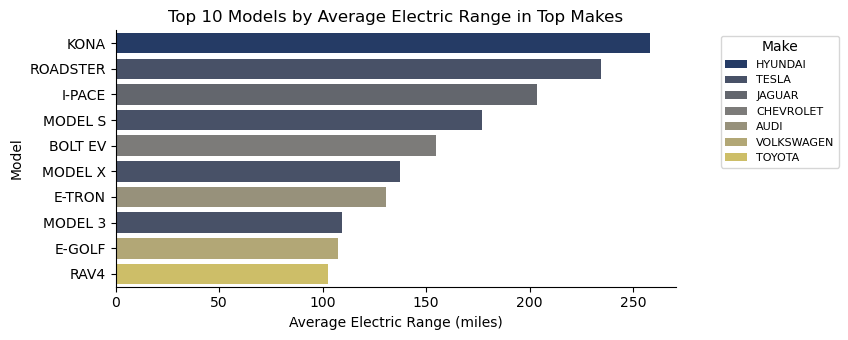

In [100]:

plt.figure(figsize=(9, 3.5))

# Plot the top 10 models by average electric range
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=df_make_model_top10.head(10), palette="cividis")

plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make',loc='upper right', bbox_to_anchor=(1.3, 1) ,fontsize=8)

sns.despine()
plt.tight_layout()
plt.show()

-   **Key Insights:**

    -   Highest Average Electric Range:

        -   The HYUNDAI KONA tops the chart with an average electric range exceeding 250 miles, making it the leader in this dataset.

    -   Dominance of Tesla:

        -   Tesla models dominate the top 10 list, with the ROADSTER, MODEL S, MODEL X, and MODEL 3 all featured prominently. This suggests Tesla's strong performance and consistency in producing EVs with high electric ranges.

    -   Diverse Manufacturers:

        -   In addition to Tesla, the chart includes models from a variety of manufacturers:

            -   JAGUAR I-PACE

            -   CHEVROLET BOLT EV

            -   AUDI E-TRON

            -   VOLKSWAGEN E-GOLF

            -   TOYOTA RAV4

        -   This diversity indicates that several manufacturers are successfully developing EVs with competitive electric ranges.

    -   Competitive Electric Ranges:

        -   All models in the top 10 list have substantial electric ranges, indicating significant advancements in battery technology and efficiency across the industry.